In [ ]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
import sklearn

In [ ]:
#read data(two list relations/features )
fichier_matrice_x1 = open("/content/drive/MyDrive/PCD/data/l59features_kmeansAE.txt", "r")
fichier_matrice_x2 = open("/content/drive/MyDrive/PCD/data/l59relationkmeansAE.txt", "r")

for line in fichier_matrice_x1:
  l1=list(line.split(" "))
for line in fichier_matrice_x2:
  l2=list(line.split(" "))

In [ ]:
#
k=3
c = np.zeros((59,6),dtype='float')
for i in range(59):
  c[i][int(l1[i])]=1
  c[i][int(l2[i])+k]=1

In [ ]:
#model autoencoder
input_df = Input( shape = (6, ))
x = Dense(5, activation = 'relu')(input_df)
#x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(4, activation ='relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(5, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(6, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#training model
autoencoder.fit(c,c, batch_size= 120, epochs = 21, verbose = 1)

Epoch 1/21
1/1 [==============================] - 0s 325ms/step - loss: 0.6293
Epoch 2/21
1/1 [==============================] - 0s 4ms/step - loss: 0.6240
Epoch 3/21
1/1 [==============================] - 0s 4ms/step - loss: 0.6187
Epoch 4/21
1/1 [==============================] - 0s 5ms/step - loss: 0.6135
Epoch 5/21
1/1 [==============================] - 0s 3ms/step - loss: 0.6083
Epoch 6/21
1/1 [==============================] - 0s 3ms/step - loss: 0.6033
Epoch 7/21
1/1 [==============================] - 0s 3ms/step - loss: 0.5982
Epoch 8/21
1/1 [==============================] - 0s 4ms/step - loss: 0.5933
Epoch 9/21
1/1 [==============================] - 0s 3ms/step - loss: 0.5884
Epoch 10/21
1/1 [==============================] - 0s 3ms/step - loss: 0.5835
Epoch 11/21
1/1 [==============================] - 0s 4ms/step - loss: 0.5788
Epoch 12/21
1/1 [==============================] - 0s 4ms/step - loss: 0.5740
Epoch 13/21
1/1 [==============================] - 0s 3ms/step - loss: 

In [ ]:
#predect compression data
pred_c = encoder.predict(c)

In [ ]:
#elbow method(choose the optimal k)
score_c = []
range_values = range(1, 15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred_c)
    score_c.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-pack

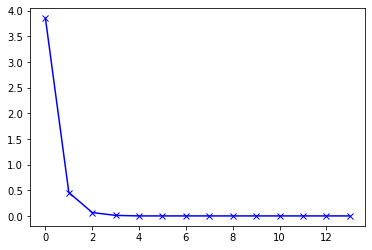

In [ ]:
plt.plot(score_c, 'bx-')

In [ ]:
#kmeans 
kmeans = KMeans(2)
kmeans.fit(pred_c)
labels_c = kmeans.labels_
silhouette_avg = silhouette_score(pred_c, labels_c)
Davies_M= sklearn.metrics.davies_bouldin_score(pred_c, labels_c)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred_c, labels_c)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

424.2014684011178
0.24540714063377564
0.8321872


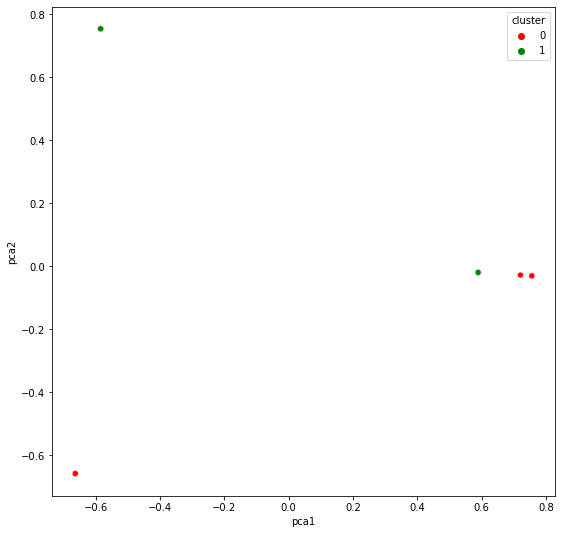

In [ ]:
# show data
pca = PCA(n_components = 2)
principal_comp2 = pca.fit_transform(c)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels_c})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df2, palette = ['red','green'])
#palette = ['red','green','blue','pink','brown','yellow']